# K-means 소개
- centroid라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포이트들을 선택하는 군집화 기법

## Step
1.군집의 개수만큼 임의의 위치(중심점)를 잡는다.
2.모든 점들은 가장 가까운 중심점에 속한다.
3.각각의 군집끼리 평균점으로 중심을 다시 잡는다.
4.중심점 소속의 변경이 없을 때까지 2,3을 반복한다.

## 장점
- 가장 많이 활용되는 알고리즘
- 쉽고 간결

## 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 정확도가 떨어짐
- 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 어려움

# K-means  class
## hyperparameter
- n_clusters : 군집화 개수
- init : 초기에 군집 중심점의 좌표를 설정할 방식.
- max_iter : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

## 주요 속성
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블(1,2,3,...) 순서는 상관 없음
- cluster_centers_ : 각 군집 중심점 좌표 shape : [군집 개수, 피처 개수]

# iris example

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## kmenas 적용
- kmeans알고맂므은 비지도학습이므로, target값을 알 수 없다.
- 따라서, labels값도 target값이 아니기 때문에 숫자의 순서는 의미없다. 단지 같은 그룹이라는 뜻뿐

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0).fit(iris_df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
iris_df['cluster'] = kmeans.labels_
iris_df['target'] = iris.target

In [6]:
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


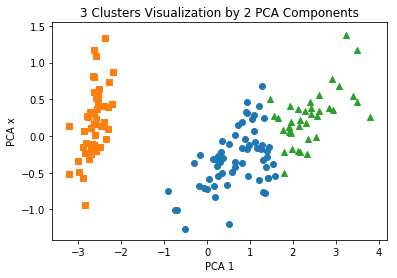

In [8]:
plt.scatter(iris_df.loc[iris_df.cluster == 0, 'pca_x'], iris_df.loc[iris_df.cluster == 0, 'pca_y'], marker = 'o')
plt.scatter(iris_df.loc[iris_df.cluster == 1, 'pca_x'], iris_df.loc[iris_df.cluster == 1, 'pca_y'], marker = 's')
plt.scatter(iris_df.loc[iris_df.cluster == 2, 'pca_x'], iris_df.loc[iris_df.cluster == 2, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA x')

plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

# clustering 알고리즘 테스트를 위한 데이터 생성
## make_blobs() 이용
- n_samples : 생성할 데이터 개수
- n_features : 데이터의 피처 개수
- centers : 군집의 개수
- cluster_std : 생성될 군집의 군집내 데이터의 표준 편차

In [18]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std=0.8, random_state=0)

print('X shape : ',X.shape, 'y shape : ',y.shape)

unique, counts = np.unique(y, return_counts=True)

print(unique, counts)

X shape :  (200, 2) y shape :  (200,)
[0 1 2] [67 67 66]


In [19]:
cluster_df = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
cluster_df['target'] = y

cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [20]:
target_list = np.unique(y)
target_list

array([0, 1, 2])

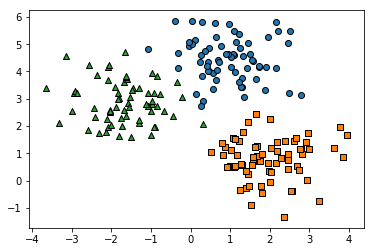

In [21]:
markers = ['o','s','^','P','D','H','x']

for target in target_list :
    target_cluster = cluster_df[cluster_df.target == target]
    plt.scatter(target_cluster['ftr1'],target_cluster['ftr2'], edgecolors='k', marker = markers[target])
plt.show()

## kmenas 적용

In [26]:
kmeans = KMeans(n_clusters=  3, max_iter = 200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmenas_label'] = cluster_labels #predicted value
cluster_df.head()

,ftr1,ftr2,target,kmenas_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


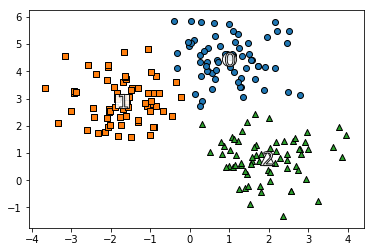

In [30]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

for label in unique_labels :
    label_cluster = cluster_df[cluster_df.kmenas_label == label]
    center_xy = centers[label]
    
    plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    
    #군집별 중심 좌표
    plt.scatter(center_xy[0], center_xy[1], s = 200, color = 'white', alpha = 0.9,
               edgecolor = 'k',marker = markers[label])
    plt.scatter(center_xy[0], center_xy[1], s = 200, color = 'white', alpha = 0.9,
               edgecolor = 'k',marker = '$%d$' %label)

In [32]:
cluster_df.groupby('target')['kmenas_label'].value_counts()

target  kmenas_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmenas_label, dtype: int64